In [28]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2
from PIL import Image


# Load data

In [38]:
# dirs with control and Diabetes martices 
raw_data_dir_ctrl = '/home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/Control/'
raw_data_dir_diabetes = '/home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/Gestational_Diabetes/'


def load_matrices(raw_dir):
    """function that read raw .mat files from directory and exctract pixel matrices and file nmaes.
    returns list of numpy matrices and list of file names"""
    raw_data_dir_fnames = os.listdir(raw_dir)
    #raw_data_dir_fnames.remove('mmc_0188_image_matrix.mat')  # we didn't use this sample until now
    print("found {} .mat files in {}".format(len(raw_data_dir_fnames), raw_dir))
    all_samples_temp = []
    all_samples_names_temp = []
    for raw_fname in raw_data_dir_fnames:
        print(raw_fname)
        mat = scipy.io.loadmat(raw_dir + raw_fname)
        try:
            mat_voxels = mat['plac_matrix']
        except KeyError:
            mat_voxels = mat['map_mat']
        all_samples_temp.append(mat_voxels)
        all_samples_names_temp.append(raw_fname.replace('_image_matrix','').replace('.mat',''))
    return all_samples_temp, all_samples_names_temp
        
    
# load control samples
all_samples_ctrl, all_samples_names_ctrl = load_matrices(raw_data_dir_ctrl)

# load Diaebetes samples
all_samples_GD, all_samples_names_GD = load_matrices(raw_data_dir_diabetes)

# merge data to one list
all_samples = all_samples_ctrl + all_samples_GD
all_samples_names = all_samples_names_ctrl + all_samples_names_GD

found 9 .mat files in /home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/Control/
emc_0117.mat
emc_0201.mat
mmc_0122.mat
hmo_0252.mat
mmc_0178.mat
hymc_0085.mat
mmc_0255.mat
mmc_0084.mat
mmc_0129.mat
found 4 .mat files in /home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/Gestational_Diabetes/
mmc_0123.mat
mmc_0086.mat
mmc_0228.mat
mmc_0128.mat


In [39]:
len(all_samples)

13

In [40]:
all_samples_names

['emc_0117',
 'emc_0201',
 'mmc_0122',
 'hmo_0252',
 'mmc_0178',
 'hymc_0085',
 'mmc_0255',
 'mmc_0084',
 'mmc_0129',
 'mmc_0123',
 'mmc_0086',
 'mmc_0228',
 'mmc_0128']

### clear pixel outside the tube

detect the tube in the samplt (by pixel threshold) and clear all the pixels outside the tube

In [ ]:
from scipy.ndimage import morphology
from skimage.morphology import remove_small_objects

# define channel and threshold
thresh, channel = 10, 4  # the tube can be seen here very good
# thresh, channel = 0.002, 3

sampl = mat_to_analyze
mask = np.zeros((mat_to_analyze.shape[0], mat_to_analyze.shape[1], mat_to_analyze.shape[2]))

for slc in range(sampl.shape[0]):
    
    # create the mask for the tube
    mask[slc,:,:] = remove_small_objects(morphology.binary_fill_holes((sampl[slc,:,:,channel] - thresh) > 0))

# extend dimension of mask to all dimensions
mask = np.repeat(mask[: ,: , :, np.newaxis], sampl.shape[-1], axis = 3)

# apply mask on sample
sampl[mask == 0] = 0


In [ ]:
# check the fillter of tube worked
import random 
fig, ax = plt.subplots(nrows= 5, ncols=6, figsize = (14, 12))

sampl = mat_to_analyze
slices = random.sample(range(sampl.shape[0]), 5)

for i, slc in enumerate(slices):
    for j in range(sampl.shape[-1]):
        ax[i][j].set_title("slice: {}, channel: {}".format(slc, j))
        ax[i][j].imshow(sampl[slc,:,:,j])
    
plt.tight_layout()
plt.show()

### Make 3d digital biopsy from raw data 

0
Analyze matrix: emc_0117
shape before cropping: (360, 280, 280, 4)
new shape is: (186, 186, 186, 4)


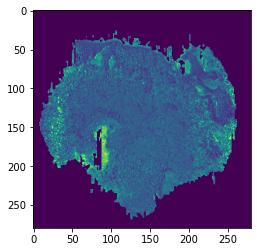

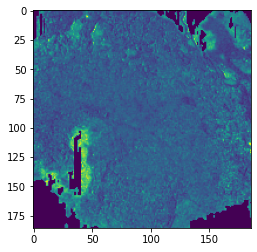

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.47157586669999674
bit value: 22.360786281342165


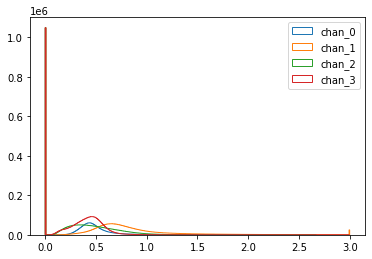

1
Analyze matrix: emc_0201
shape before cropping: (360, 280, 280, 4)
new shape is: (186, 186, 186, 4)


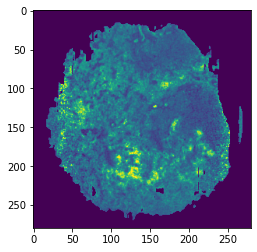

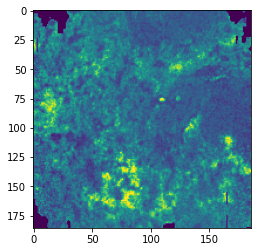

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.6198005160222122
bit value: 22.490539743668364


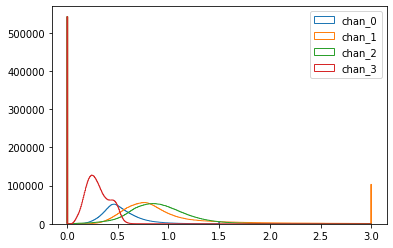

2
Analyze matrix: mmc_0122
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


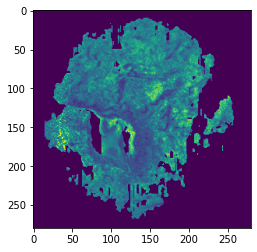

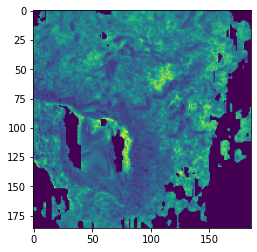

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5265830087674965
bit value: 22.240525250181033


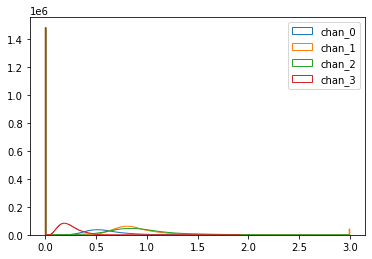

3
Analyze matrix: hmo_0252
shape before cropping: (320, 280, 280, 4)
new shape is: (186, 186, 186, 4)


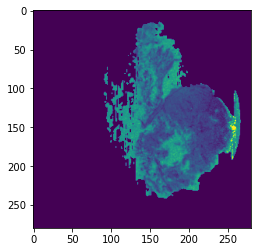

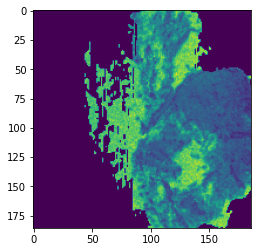

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.24751657494341167
bit value: 21.46963684938232


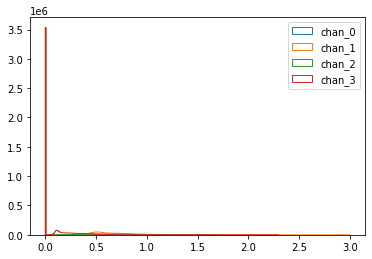

4
Analyze matrix: mmc_0178
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


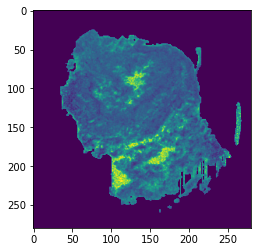

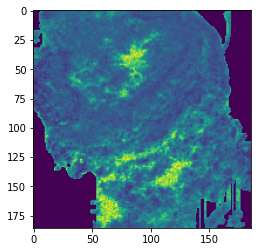

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4914921546867618
bit value: 22.220325478894953


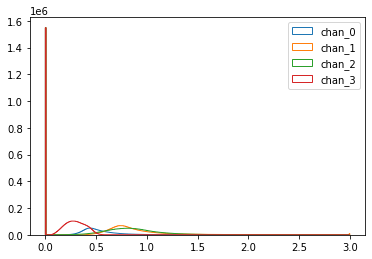

5
Analyze matrix: hymc_0085
shape before cropping: (420, 280, 280, 4)
new shape is: (186, 186, 186, 4)


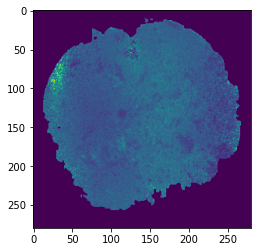

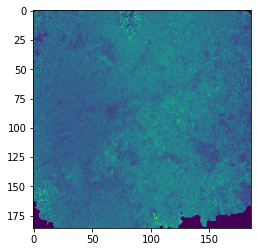

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5763454862902747
bit value: 22.512770597710276


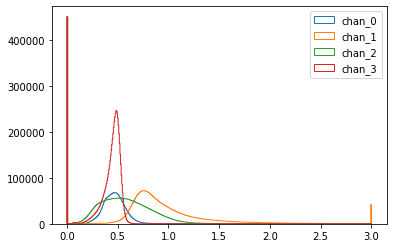

6
Analyze matrix: mmc_0255
shape before cropping: (420, 280, 280, 4)
new shape is: (186, 186, 186, 4)


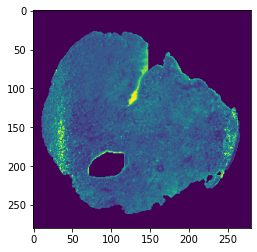

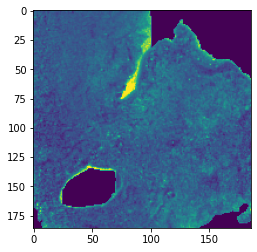

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.529352977019987
bit value: 22.361465681033156


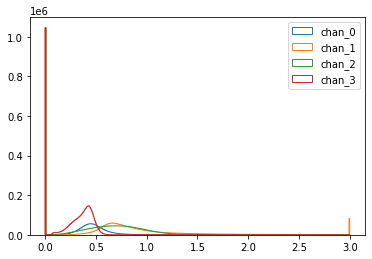

7
Analyze matrix: mmc_0084
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


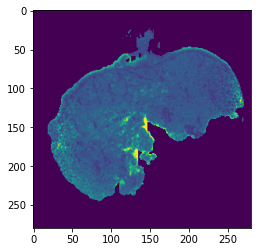

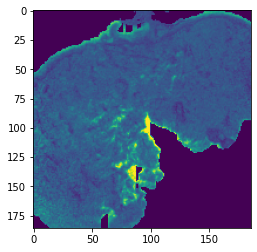

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4772496283147875
bit value: 22.153146256250864


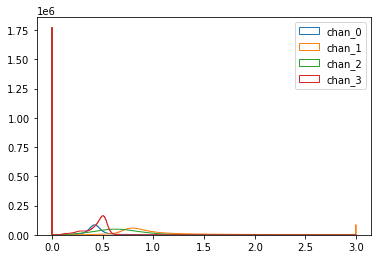

8
Analyze matrix: mmc_0129
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


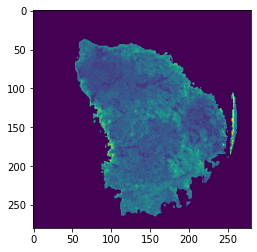

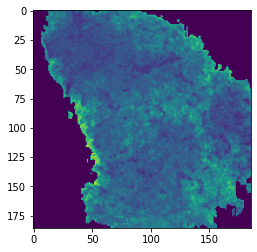

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4244442738049233
bit value: 22.10141726621092


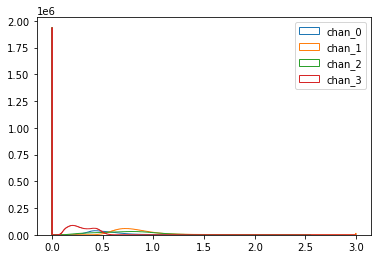

9
Analyze matrix: mmc_0123
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


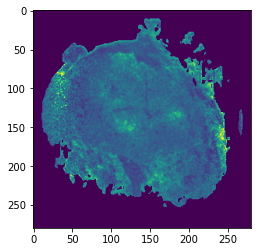

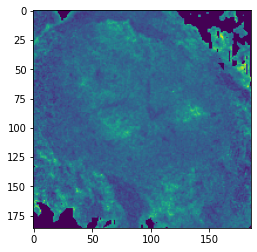

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5268181076793864
bit value: 22.414856562184404


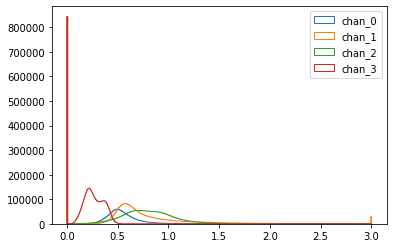

10
Analyze matrix: mmc_0086
shape before cropping: (380, 280, 280, 4)
new shape is: (186, 186, 186, 4)


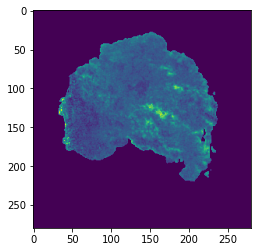

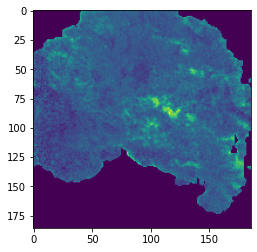

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.391894645214132
bit value: 22.004997748423886


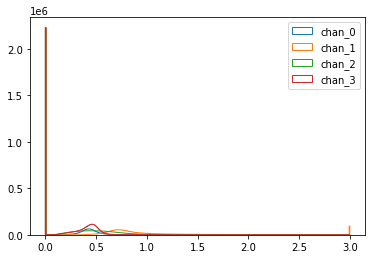

11
Analyze matrix: mmc_0228
shape before cropping: (420, 280, 280, 4)
new shape is: (186, 186, 186, 4)


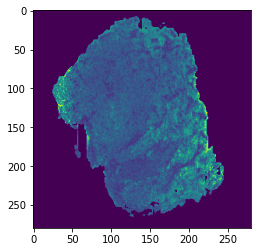

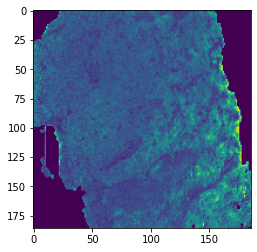

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.5544719693983424
bit value: 22.415693807751158


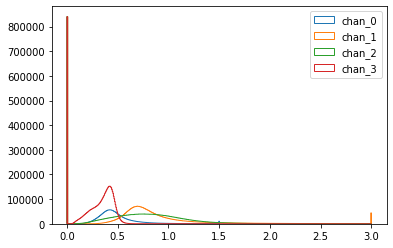

12
Analyze matrix: mmc_0128
shape before cropping: (400, 280, 280, 4)
new shape is: (186, 186, 186, 4)


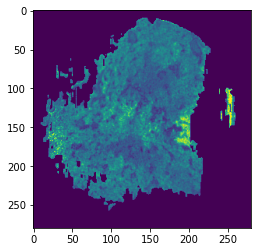

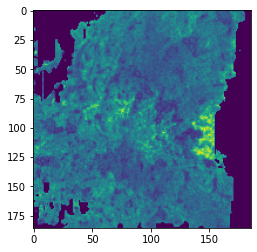

number of NaNs in matrix: 0
Converting NaNs to 0

shape of matrix: (186, 186, 186, 4)
min val: 0.0
max val: 3.0
mean val: 0.4640574661068367
bit value: 22.237703043502293


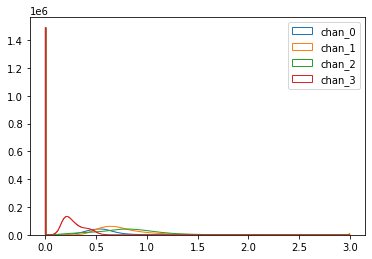

In [41]:
cropped_matrices = []
for fname, mat_to_analyze in zip(all_samples_names, all_samples):
    print(len(cropped_matrices))
    print("Analyze matrix:", fname)
    print("shape before cropping:", mat_to_analyze.shape)

    d = mat_to_analyze.shape[0]
    w = mat_to_analyze.shape[1]
    h = mat_to_analyze.shape[2]
    c = mat_to_analyze.shape[3]

    if w != h:
        print("Error: Width and height are not same size")
    if w != 280 or h != 280:
        print("ERROR: shapes of all samples in not the same")

    size_from_center = 93
    cube_mat = mat_to_analyze[int(d/2 - size_from_center):int(d/2 + size_from_center),
                              int(w/2 - size_from_center):int(w/2 + size_from_center),
                              int(h/2 - size_from_center):int(h/2 + size_from_center), :]


    print("new shape is:", cube_mat.shape)

    plt.imshow(mat_to_analyze[int(mat_to_analyze.shape[0]/2)-4, :,:,0])
    plt.imsave('emc0300_6d_T1W_slice90.png', mat_to_analyze[int(mat_to_analyze.shape[0]/2)-4, :,:,0])
    plt.show()
    plt.imshow(cube_mat[int(cube_mat.shape[0]/2+1)-4, :, :,0])
    plt.imsave('digBiopsy_emc0300_6d_T1W_slice90.png', cube_mat[int(cube_mat.shape[0]/2+1)-4, :, :,0])
    plt.show()

    # add matrix to list
    mat_to_analyze = cube_mat



    ## Clear Na's and get statistics

    def clear_NA_and_get_stats(np_mat):
        """convert missing values to 0"""
        # count nan's in file
        print("number of NaNs in matrix:",np.count_nonzero(np.isnan(np_mat)))

        #convert nans to 0
        print("Converting NaNs to 0")
        where_are_NaNs = np.isnan(np_mat)
        np_mat[where_are_NaNs] = 0

        print()
        print("shape of matrix:",np_mat.shape)
        print("min val:", np.nanmin(np_mat))
        print("max val:", np.nanmax(np_mat))
        print("mean val:",np.nanmean(np_mat))
        print('bit value:', np.log2(len(np.unique(mat_to_analyze[:,:,:,3]))))

    clear_NA_and_get_stats(mat_to_analyze)



    for ch in range(mat_to_analyze.shape[-1]):
        plt.hist(mat_to_analyze[:,:,:,ch].ravel(), histtype='step', bins=512)

    plt.legend(['chan_' + str(i) for i in range(c)])
    plt.show()

    # Normalize function to normalize matrix between 0 and 1
    def crop_histogram(x, clip_percentile, show=True):
        def get_stats(x, threshold):
            if show:
                print("min:", x.min())
                print("max:", x.max())            
                plt.hist(x.ravel(), bins=1024)
                plt.axvline(threshold, color='red')
                plt.show()

        threshold = np.percentile(x, clip_percentile)

        print("stats before:")
        get_stats(x, threshold)

        x[x > threshold] = threshold
        x[x < 0] = 0

        print("stats after:")
        get_stats(x, threshold=threshold)

        return x


#     # norm each cahnnel separately
#     mat_ch_normed = np.zeros(mat_to_analyze.shape)

#     mat_ch_normed[:,:,:,0] = crop_histogram(mat_to_analyze[:,:,:, 0], clip_percentile = 99.6, show=True)
#     mat_ch_normed[:,:,:,1] = crop_histogram(mat_to_analyze[:,:,:, 1], clip_percentile = 99, show=True)
#     mat_ch_normed[:,:,:,2] = crop_histogram(mat_to_analyze[:,:,:, 2], clip_percentile = 99, show=True)
#     mat_ch_normed[:,:,:,3] = crop_histogram(mat_to_analyze[:,:,:, 3], clip_percentile = 99, show=True)
# #     mat_ch_normed[:,:,:,4] = crop_histogram(mat_to_analyze[:,:,:, 4], clip_percentile = 99.6, show=True)
# #     mat_ch_normed[:,:,:,5] = crop_histogram(mat_to_analyze[:,:,:, 5], clip_percentile = 99.6, show=True)


#     plt.hist(mat_ch_normed[:,:,:,0].ravel(), histtype='step', bins=512)
#     plt.hist(mat_ch_normed[:,:,:,1].ravel(), histtype='step', bins=512)
#     plt.hist(mat_ch_normed[:,:,:,2].ravel(), histtype='step', bins=512)
#     plt.hist(mat_ch_normed[:,:,:,3].ravel(), histtype='step', bins=512)
# #     plt.hist(mat_ch_normed[:,:,:,4].ravel(), histtype='step', bins=512)
# #     plt.hist(mat_ch_normed[:,:,:,5].ravel(), histtype='step', bins=512)

#     plt.legend(['chan_' + str(i) for i in range(c)])
#     plt.show()



    # add mat to list
    cropped_matrices.append(mat_to_analyze)

## Standarize data (Standard scaling on channels)

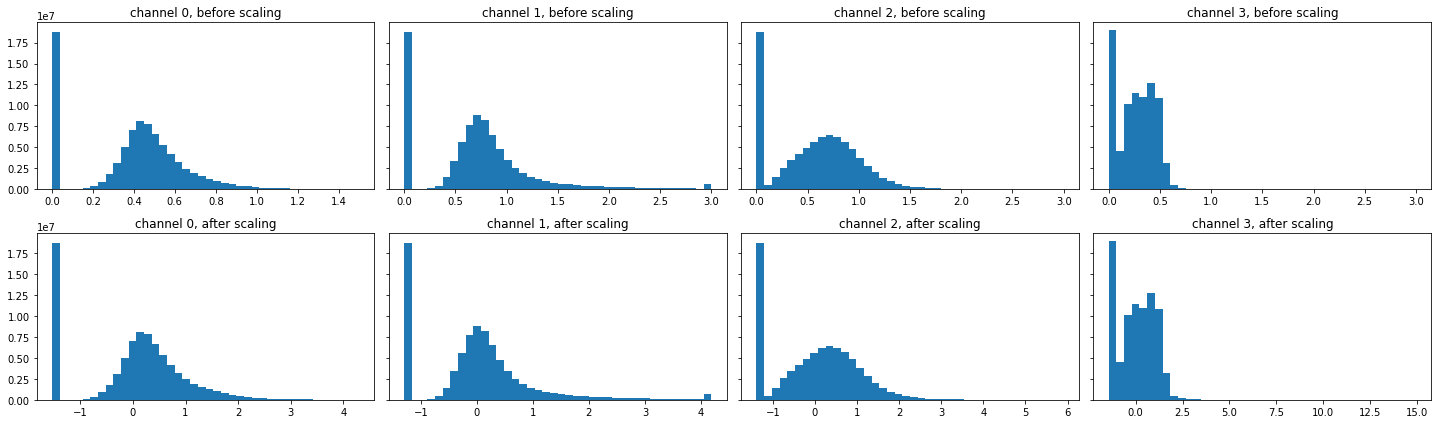

In [42]:
from sklearn.preprocessing import StandardScaler
import pickle

cropped_matrices = np.stack(cropped_matrices[:])

fig, ax = plt.subplots(2, cropped_matrices.shape[-1], figsize=(20,6), sharey=True)

for i in range(cropped_matrices.shape[-1]):
    ax[0][i].hist(cropped_matrices[:,:,:,:,i].ravel(), bins=40)
    ax[0][i].set_title("channel {}, before scaling".format(i))

scaler = StandardScaler()
scaler.fit(cropped_matrices.reshape(-1, cropped_matrices.shape[-1]))
cropped_matrices = scaler.transform(cropped_matrices.reshape(-1, cropped_matrices.shape[-1])).reshape(cropped_matrices.shape)
with open("13_samlple_4ch_std_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

for i in range(cropped_matrices.shape[-1]):
    ax[1][i].hist(cropped_matrices[:,:,:,:,i].ravel(), bins=40)
    ax[1][i].set_title("channel {}, after scaling".format(i))

plt.tight_layout()
plt.show()

In [43]:
scaler.mean_

array([0.3953697 , 0.70912104, 0.57103245, 0.26343148])

In [16]:
# stack list of all matrices to numpy array
print(cropped_matrices.shape)
print(cropped_matrices.max())
print(cropped_matrices.min())


# save the matrix in numpy format
np.save('/home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/13_samples_4ch_digbiopsy.npy', cropped_matrices)

(13, 186, 186, 186, 4)
14.955686239533993
-1.5386987157726089


In [27]:
(cropped_matrices[0] == cropped_matrices[7]).sum() / (186*186*186)

0.2890976892101393

## Load the all_samples_cropped file

In [41]:
cropped_matrices = np.load('/home/labs/neeman/Collaboration/Placenta_MRI_2021/data/raw_data_dropbox/4channels/13_samples_4ch.npy')

# Clustering

In [45]:
# choose a sample
sname = '9_control'
mat_to_analyze = np.array(cropped_matrices[:2])
all_samples_names = all_samples_names[:2]
mat_to_analyze.shape

(2, 186, 186, 186, 4)

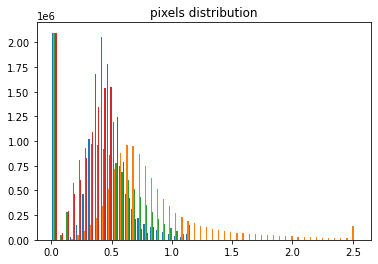

In [46]:
#visualize pixel distribution
# plt.hist(np.reshape(mat_to_analyze, newshape=(mat_to_analyze.shape[0] * mat_to_analyze.shape[1] * mat_to_analyze.shape[2])),bins = 30)
# plt.hist(np.reshape(mat_to_analyze, newshape=(mat_to_analyze.shape[0] * mat_to_analyze.shape[1] * mat_to_analyze.shape[2], mat_to_analyze.shape[3])),bins = 30)
plt.hist(np.reshape(mat_to_analyze, newshape=(mat_to_analyze.shape[0] * mat_to_analyze.shape[1] * mat_to_analyze.shape[2] * mat_to_analyze.shape[3], 
                                              mat_to_analyze.shape[4])),bins = 50)
plt.title("pixels distribution")
plt.show()

In [47]:
# reshape the array to a vector
print("shpae before:", mat_to_analyze.shape)
# vec_to_cluster = np.reshape(mat_to_analyze, newshape=(mat_to_analyze.shape[0] * mat_to_analyze.shape[1] * mat_to_analyze.shape[2], 1))
# vec_to_cluster = np.reshape(mat_to_analyze, newshape=(mat_to_analyze.shape[0] * mat_to_analyze.shape[1] * mat_to_analyze.shape[2], mat_to_analyze.shape[3]))
vec_to_cluster = np.reshape(mat_to_analyze, newshape=(mat_to_analyze.shape[0] * mat_to_analyze.shape[1] * mat_to_analyze.shape[2] * mat_to_analyze.shape[3],
                                                      mat_to_analyze.shape[4]))
print("shpae after:", vec_to_cluster.shape)

shpae before: (2, 186, 186, 186, 4)
shpae after: (12869712, 4)


### K-Means clustering

In [444]:
# calculate Kmeans
from sklearn.cluster import KMeans

k = 2
num_clusters = k
kmeans = KMeans(n_clusters=num_clusters, n_jobs=10).fit(vec_to_cluster)
print("shape of kmeans is:", kmeans.cluster_centers_.shape)
kmeans.cluster_centers_


shape of kmeans is: (2, 6)


array([[0.39683678, 0.49383053, 0.29876897, 0.51199099, 0.613838  ,
        0.22034772],
       [0.50494314, 0.26178379, 0.23212683, 0.18829386, 0.65667627,
        0.48965429]])

In [446]:
# find the order of the Kmeans according to their values (lowest=index 0)

idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
ordered_labels = np.zeros_like(idx)
ordered_labels[idx] = np.arange(kmeans.cluster_centers_.shape[0])
print(ordered_labels)
ordered_labels = {i:ordered_labels[i] for i in range(len(ordered_labels))}
print(ordered_labels)
labels_mat = np.array([ordered_labels[k] for k in kmeans.labels_])

[1 0]
{0: 1, 1: 0}


In [448]:
# reshape the vector back to 3D array
# all_labels_discrete = np.reshape(labels_mat.astype('int8'), newshape=(mat_to_analyze.shape[0], mat_to_analyze.shape[1], mat_to_analyze.shape[2]))
all_labels_discrete = np.reshape(labels_mat.astype('int8'), newshape=(mat_to_analyze.shape[0], mat_to_analyze.shape[1], mat_to_analyze.shape[2], mat_to_analyze.shape[3]))
# all_labels_discrete = np.array(vec_to_image, dtype='int8')  #convert to 'int8'. spare memmory
all_labels_discrete.shape

(1, 186, 186, 186)

In [340]:
# save the all_labels_discrete as .npy file
path_to_save_files = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/{}_labels/Kmeans_{}_means'.format(sname, k)
os.makedirs(path_to_save_files, exist_ok=True)

np.save(os.path.join(path_to_save_files,'labels_mask_6ch.npy'), all_labels_discrete)


In [351]:
# save the all_labels_discrete in separate directories
for sample_ids, sample_name in enumerate(all_samples_names):
    for label in ordered_labels.keys():

        # create a direcoty for each label
        dir_path = os.path.join(path_to_save_files,sample_name,'no_filter','label_{}'.format(label))
        if not os.path.isdir(dir_path):
            os.makedirs(dir_path, exist_ok=True)

        # get discrte labels 
        label_x = np.array((all_labels_discrete == label) + 0, dtype='int8')

        # save the masks in slices
        for j in range(label_x.shape[1]):
            plt.imsave(os.path.join(dir_path, '{}_mask{}.tiff'.format(sname, j)), label_x[sample_ids,j,:,:])

In [ ]:
# save the all_labels_soft in separate directories
for i, label in enumerate(labels):
    # create a direcoty to soft label
    dir_path ='/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/{}_labels'.format(sname)
    if not os.path.isdir(dir_path):
        os.mkdir(dir_path, mode=777)
    # multiply discrte label in original array values
    label_x = np.array((all_labels_discrete == label) + 0, dtype='int8')
    label_x_value = label_x * mat_to_analyze

    # save the soft mask
    for j in range(vec_to_image.shape[2]):
        f_path = 'label_{}_soft'.format(i)  # make dir 
        if not os.path.isdir(os.path.join(dir_path,f_path)):
            os.mkdir(os.path.join(dir_path, f_path), mode = 777)
        plt.imsave(os.path.join(dir_path, f_path, '{}_mask{}.tiff'.format(sname, j)), label_x_value[:,:,j])

In [19]:
# create a single label array in soft mode
label = 3
label_x = np.array((all_labels_discrete == label) + 0, dtype='int8')
label_x_soft = label_x * mat_to_analyze
print("number of unique values:", len(np.unique(label_x_soft)))
print("min val:", label_x_soft.min())
print("max val:", label_x_soft.max())

number of unique values: 2751
min val: 0.0
max val: 0.001210254841017217


In [3]:
plt.plot(all_labels_discrete[100,:,:])
plt.show()

NameError: name 'all_labels_discrete' is not defined

### Fuzzy c clustering

In [50]:
from fcmeans import FCM

In [51]:
t = vec_to_cluster[:10000,:]

In [53]:
%%time
fcm = FCM(n_clusters=10)
fcm.fit(t)

CPU times: user 49.7 s, sys: 1min 31s, total: 2min 20s
Wall time: 2.26 s


In [54]:
fcm.centers

array([[5.39399368e-01, 5.47451522e-01, 5.50390522e-01, 4.23373491e-01],
       [6.40022269e-01, 4.96147248e-01, 5.84101784e-01, 2.85741187e-01],
       [4.55160907e-01, 5.65607245e-01, 5.23142128e-01, 5.16367821e-01],
       [6.50420917e-01, 4.65723434e-01, 5.67872830e-01, 2.20787365e-01],
       [5.76516399e-01, 5.14282805e-01, 5.73367046e-01, 3.69728429e-01],
       [4.14856588e-01, 6.08142097e-01, 5.83940925e-01, 7.87114384e-01],
       [7.03392604e-01, 4.82073512e-01, 6.29981094e-01, 1.94397810e-01],
       [8.58514102e-01, 3.76258923e-01, 8.74987619e-01, 1.61259672e-01],
       [4.17672919e-01, 5.25874064e-01, 5.34419667e-01, 7.45171353e-01],
       [4.68520122e-07, 4.27744486e-07, 5.04901065e-07, 3.36820316e-07]])

(array([  52.,   71.,   51.,   55.,   44.,   20.,   43.,   47.,   29.,
        9588.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

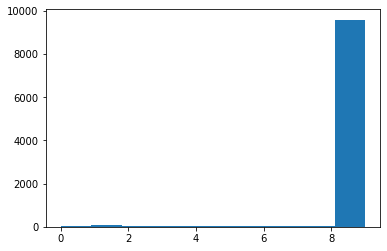

In [55]:
plt.hist(fcm.predict(t))

In [21]:
# make
t2 = vec_to_cluster[:10000,:4]
fcm2 = FCM(n_clusters=4)
fcm2.fit(t2)

In [22]:
fcm2.centers

array([[0.42909325, 0.25945472, 0.19699352, 0.31523048],
       [0.38427103, 0.3899773 , 0.2331183 , 0.51140439],
       [0.30766346, 0.31674603, 0.1435415 , 0.41330686],
       [0.63758595, 0.12036901, 0.21683107, 0.16418143]])

In [38]:
fcm2.predict(t2)

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
clusters_map = {}
for i in range(4):
    ref_col = fcm.centers[i,:4]
    min_delta = np.inf
    for j in range(4):
        delta = np.abs(ref_col - fcm2.centers[j, :]).sum()
        if delta < min_delta:
            min_delta = delta
            clusters_map[i] = j

In [40]:
clusters_map

{0: 3, 1: 0, 2: 1, 3: 2}

In [41]:
np.vectorize(clusters_map.get)(fcm2.predict(t2))

array([3, 3, 0, ..., 3, 3, 3])

In [ ]:
idx = np.argsort(fcm.centers.sum(axis=1))  #sort indices
ordered_labels = np.zeros_like(idx)
ordered_labels[idx] = np.arange(fcm.centers.shape[0])
print("NOW")
print(ordered_labels)
ordered_labels = {i:ordered_labels[i] for i in range(len(ordered_labels))}
print(ordered_labels)
print(fcm_ref.predict(vec_to_cluster)[:10])
labels_mat = np.array([ordered_labels[k] for k in fcm_ref.predict(vec_to_cluster)])

In [46]:
import pickle
with open("model_test.pkl", "wb") as f:
    pickle.dump(fcm, f)

In [48]:
with open("model_test.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [54]:
np.savetxt('centers.txt', fcm.centers)

In [56]:
labels = fcm.predict(vec_to_cluster)

In [57]:
quaintized_array = fcm.centers[labels]

In [58]:
quaintized_array.shape

(12869712, 4)

In [460]:
# all_labels_discrete = np.reshape(quaintized_array, newshape=(mat_to_analyze.shape[0], mat_to_analyze.shape[1], mat_to_analyze.shape[2], mat_to_analyze.shape[3]))
all_labels_discrete = np.reshape(labels.astype('int8'), newshape=(mat_to_analyze.shape[0], mat_to_analyze.shape[1], mat_to_analyze.shape[2], mat_to_analyze.shape[3]))


# Filtering and single 3D matrix

In [9]:
# load the all labels discrete matrix
LOAD_MAT = True
if LOAD_MAT:
    all_labels_discrete = np.load('/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/KMEANS_8_means/labels_mask_6ch.npy')

print(all_labels_discrete.shape)
print("the unique values are:",np.unique(all_labels_discrete[:,:,:]))

(8, 186, 186, 186)
the unique values are: [0 1 2 3 4 5 6 7]


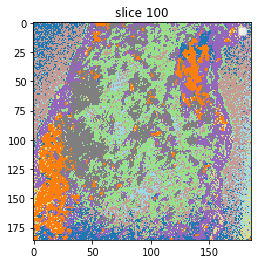

In [10]:
# show a single slice from the all_labels array
plt.imshow(all_labels_discrete[0,100,:,:], cmap = 'tab20')
# plt.imshow(t, cmap='tab20')
plt.legend(['label_0', 'label_1','label_2'])
plt.title("slice 100")
plt.show()

### Make filter

In [ ]:
from scipy.stats import mode
from scipy.ndimage import generic_filter

# def mode_val_old(rec):
#     return mode(mode(rec)[0][0])[0]

def mode_val(rec):
    return mode(rec,axis=None)[0]

def mean_val(rec):
    return np.mean(rec)

  

fig, ax = plt.subplots(2,3, figsize=(20,14))

# line of filter of (3,3)
ax[0][0].imshow(all_labels_discrete[0,100,:,:], cmap = 'tab20')
ax[0][0].set_ylabel("filter size:3")
ax[0][0].set_title("original slice")

t = generic_filter(input=all_labels_discrete[0,100,:,:],function=mode_val,size=(3,3),mode='constant')
ax[0][1].imshow(t, cmap = 'tab20')
ax[0][1].set_title("2D filter")

t1 = generic_filter(input=all_labels_discrete[0,100,:,:],function=mean_val,size=(3,3),mode='constant')
ax[0][2].imshow(t1, cmap = 'tab20')
ax[0][2].set_title("2D filter- 'mean' mode")

# t2 = generic_filter(input=all_labels_discrete[0,100,:,:],function=mode_val,size=(3,3,3),mode='constant')
# ax[0][3].imshow(t2, cmap = 'tab20')
# ax[0][3].set_title("3D filter")

# t3 = generic_filter(input=all_labels_discrete[0,100,:,:],function=mean_val,size=(3,3,3),mode='constant')
# ax[0][4].imshow(t3, cmap = 'tab20')
# ax[0][4].set_title("3D filter - 'all' mode")


plt.suptitle("effect of different filters")
plt.show()

In [352]:
# Make a GIF from the slices

def make_gif(pat_dir_of_images):
    # load .png files to make the git into list
    images_for_anim = glob.glob(pat_dir_of_images + '/*.png')
    print("number of files found:", len(images_for_anim))
    
    frames_for_anim = []
    for idx_img in range(len(images_for_anim)):
        new_frame = Image.open(pat_dir_of_images + '/mask{}.png'.format(idx_img))
        frames_for_anim.append(new_frame)

    # save as GIF
    frames_for_anim[0].save(os.path.join(pat_dir_of_images + 'mask_gif.gif'), format='GIF',append_images=frames_for_anim[1:],save_all=True,duration=400, loop=0)
    


In [ ]:
# save slices with all labels without filter
WITH_FILTER=True

if WITH_FILTER:
    path = os.paht.join()'all_labels_filter33/'.format(sname)
else:
    path = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/{}_labels/4_channels/all_labels_nofilter/'.format(sname)


if not os.path.isdir(path):
    os.mkdir(path)
    
for i in range(all_labels_discrete.shape[0]):
    if WITH_FILTER:
        im = generic_filter(all_labels_discrete[i,:,:], mode_val, (3,3))
    else:
        im = all_labels_discrete[i,:,:]
    plt.title("slice {}".format(i))
    plt.imsave(os.path.join(path, 'mask{}.png'.format(i)), im)
    
# make gif
make_gif(path)

## Load all_

In [564]:
dir_path = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/4_control_labels/FCM_8_means/emc0296_6d/filter33'
imgs = glob.glob(dir_path+'/*.png',)

# sort images by thery mask index
imgs = sorted(imgs, key= lambda x: int(x[x.find('mask') + 4:x.rfind('.')]))

imgs_array = np.zeros((186, 186, 186))
for i, img_path in enumerate(imgs):
    imgs_array[i, :, :] = np.asarray(Image.open(img_path).convert('L'))
    
maping = {label: value for label, value in zip(range(len(np.unique(img))), np.unique(img))}


for label, value in maping.items():
    path = os.path.join(dir_path, 'label_{}'.format(label))
    os.makedirs(path, exist_ok=True)
    
    temp = imgs_array.copy()
    temp[temp != value] = 0
    
    for i in range(temp.shape[0]):
        plt.imsave(os.path.join(path, 'mask{}.tiff'.format(i)), temp[i,:,:])
    

In [45]:
# load the sof labels into a numpy array

images = np.zeros((7,300,380,300))
for i in range(7):
    imgs_array = np.zeros((300,380,300))
    dir_path = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/emc_0156_labels/label_{}_soft'.format(i)
    imgs = glob.glob(dir_path+'/*.tiff')
    for im in range(len(imgs)):
        imgs_array[im,:,:] = cv2.imread(imgs[im],0)
    images[i,:,:,:] = imgs_array[:,:,:]

# add grayscale image to clusters

In [10]:
all_labels_discrete = np.load('/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_15_means/labels_mask_6ch.npy')


In [11]:
sample_num = 2
mat_to_show = all_labels_discrete[sample_num, :,:,:]

In [12]:
channel = 0
label = 8
num_slice = 90

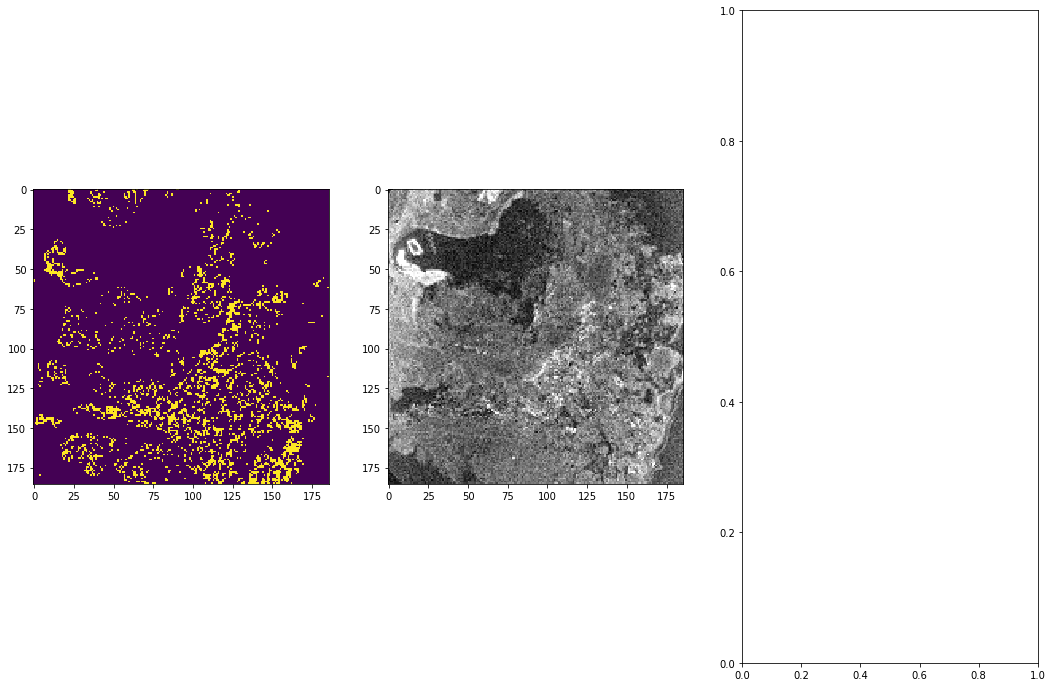

In [31]:
def combine_orig_with_label(slc_mask, slice_orig, show=True):
    def normalize(slc):
        norm = plt.Normalize(vmin=slc.min(), vmax=slc.max())
        return norm(slice_orig)
    
    slice_orig_norm = normalize(slice_orig)
    slice_mask_norm = normalize(slc_mask)

    arr = np.zeros((186,186,3))

    slc_mask_temp = slc_mask
    slc_mask_temp[slc_mask_temp != 0] = slice_orig_norm.max()

    orig_gray = np.ndarray((slice_orig.shape[0],slice_orig.shape[1], 3))
    orig_gray[:,:,0]=slice_orig
    orig_gray[:,:,1]=slice_orig
    orig_gray[:,:,2]=slice_orig
    
    mask_color = np.ndarray((slc_mask.shape[0], slc_mask.shape[1], 3))
    mask_color[:,:,0]=0
    mask_color[:,:,1]=0
    mask_color[:,:,2]= label_x*255 
    
    combined_img = orig_gray.copy()
    combined_img[slc_mask != 0] = 256
    

    if show:
        fig, ax = plt.subplots(1,3, figsize=(18,12))
        ax[0].imshow(slc_mask_temp)
        ax[1].imshow(slice_orig, cmap='gray')
#         ax[2].imshow(combined_img)
        
        dst = cv2.addWeighted(orig_gray*255, 0.2, mask_color, 0.5, 0)
        cv2.imwrite('opencv_add_weighted1.jpg', orig_gray*255)
        cv2.imwrite('opencv_add_weighted2.jpg', mask_color)
        cv2.imwrite('opencv_add_weighted.jpg', dst)
#         cv2.imshow('window_name', dst)
#         ax[0].imshow(slc_mask_temp)  # mask
#         ax[1].imshow(slice_orig, cmap='gray')  # original channels
        
        
#         ax[2].imshow(slice_orig, cmap='gray')
#         ax[2].imshow(slc_mask_temp, alpha=0.7)

        plt.show()
    
    return arr


slice_to_show = mat_6ch_normed[num_slice,:,:,channel]

label_x = mat_to_show[num_slice,:,:].copy()
label_x = np.array((label_x == label) + 0, dtype='int8')
# label_x_soft = label_x * mat_to_analyze

# use soft label
# label_soft_slc = plt.imread('/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/emc_0156_labels/label_{}_soft/emc_0156_mask{}.tiff'.format(label+1, num_slice))
# label_soft_slc = label_x_soft[:,:,num_slice]
    
# use dicrete slices
# slc_discrete = all_labels_discrete[num_slice,:,:].copy()
# slc_discrete[slc_discrete != label] = 0

img_arr = combine_orig_with_label(label_x.copy(), slice_to_show)

# img_arr = combine_orig_with_label(label_x.copy(), slice_to_show)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


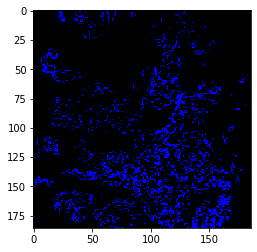

In [30]:
# plt.imshow(label_x)
mask_color = np.ndarray((label_x.shape[0],label_x.shape[1],3))
mask_color[:,:,0]=0
mask_color[:,:,1]=0
mask_color[:,:,2]= label_x*255 

plt.imshow(mask_color)

In [42]:
np.unique(mask_color)
# plt.imshow(mask_color[:5,:5,:])
# mask_color[:5,:5,:]

array([0., 1., 2.])

In [81]:
len(np.unique(slice_to_show))
uint_img = np.array(slice_to_show*255).astype('uint8')

In [ ]:
grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
cv2.imshow('hi',grayImage)

In [86]:
grayImage

array([[[ 36,  36,  36],
        [ 57,  57,  57],
        [ 44,  44,  44],
        ...,
        [ 69,  69,  69],
        [ 28,  28,  28],
        [ 50,  50,  50]],

       [[ 40,  40,  40],
        [ 26,  26,  26],
        [ 49,  49,  49],
        ...,
        [ 35,  35,  35],
        [ 46,  46,  46],
        [ 84,  84,  84]],

       [[ 67,  67,  67],
        [ 19,  19,  19],
        [ 29,  29,  29],
        ...,
        [ 81,  81,  81],
        [ 58,  58,  58],
        [ 47,  47,  47]],

       ...,

       [[145, 145, 145],
        [127, 127, 127],
        [150, 150, 150],
        ...,
        [112, 112, 112],
        [135, 135, 135],
        [119, 119, 119]],

       [[153, 153, 153],
        [143, 143, 143],
        [127, 127, 127],
        ...,
        [ 69,  69,  69],
        [104, 104, 104],
        [117, 117, 117]],

       [[140, 140, 140],
        [191, 191, 191],
        [ 42,  42,  42],
        ...,
        [124, 124, 124],
        [135, 135, 135],
        [114, 114, 114]]

In [52]:
# save the grayscale_with_label
label = 3
orig = MTthres_0156
for i in range(300):
    # create a direcoty
    dir_path ='/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/{}_orig_with_labels'.format(sname)
    if not os.path.isdir(dir_path):
        os.mkdir(dir_path, mode=777)
    f_path = 'orig_with_softlabel{}'.format(label)  # make dir 
    if not os.path.isdir(os.path.join(dir_path,f_path)):
        os.mkdir(os.path.join(dir_path, f_path), mode = 777)
    
    orig_slice = orig[:,:,i]
    
    # use soft slices  (by load the image or use the numpy array)
#     label_soft_slc = plt.imread('/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/emc_0156_labels/label_{}_soft/emc_0156_mask{}.tiff'.format(label, i))
#     soft_slice = label_x_soft[:,:,i]
    
    # use discrete slices
#     discrete_slice = all_labels_discrete[:,:,i]
    slc_discrete = all_labels_discrete[:,:,i].copy()
    slc_discrete[slc_discrete != label] = 0
    
    # combine orig and label and save
    img_arr = combine_orig_with_label(soft_slice, orig_slice, show=False)
    plt.imsave(os.path.join(dir_path, f_path, '{}_orig_with_mask{}.tiff'.format(sname, i)), img_arr)

NameError: name 'MTthres_0156' is not defined

In [137]:
label

3

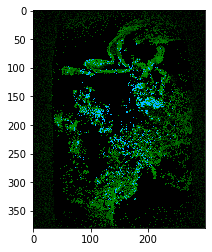

In [132]:
orig = MTthres_0156
orig_slice = orig[:,:,200]

# discrete_slice = all_labels_discrete[:,:,200]
slc_discrete = all_labels_discrete[:,:,200].copy()
slc_discrete[slc_discrete != label] = 0

# combine orig and label and save
img_arr = combine_orig_with_label(slc_discrete, orig_slice, show=False)
plt.imshow(img_arr)

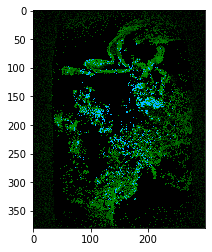

In [136]:
plt.imshow(plt.imread('/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/emc_0156_orig_with_labels/orig_with_label3/emc_0156_orig_with_mask200.tiff'))

### Mege multiple channels into one figure

In [170]:
# apply a color map to each channel and merge them into one figure. 
def img_cmap(img, cmap):
    norm = plt.Normalize(vmin=img.min(), vmax=img.max())
    # map the normalized data to the color map
    image = cmap(norm(img))
    print(image.shape)
    image = image[:,:,:]
    return Image.fromarray((image[:, :, :3] * 255).astype(np.uint8))

In [117]:
sample_dir = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/emc_0113_labels'
first_label = 6
second_label = 5

for i in range(300):
    img1 = plt.imread(os.path.join(sample_dir, 'label_{}_soft/emc_0113_mask{}.tiff'.format(first_label, i)))
    img1 = img_cmap(img1, plt.cm.Blues)
    
    img2 = plt.imread(os.path.join(sample_dir, 'label_{}_soft/emc_0113_mask{}.tiff'.format(second_label, i)))
    img2 = img_cmap(img2, plt.cm.Reds)
    
    Image.blend(img1, img2, 0.5).save(os.path.join(sample_dir, 'merged_{}_{}/mask{}.tiff'.format(first_label, second_label,i)))

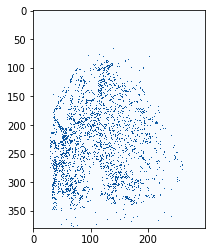

In [98]:
cmap = plt.cm.Blues
norm = plt.Normalize(vmin=label_5.min(), vmax=label_5.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(label_5))
image_b = image[:,:,1,:]
plt.imshow(image_b)
# save the image
# plt.imsave('test.png', image)

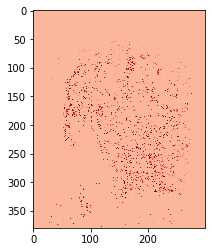

In [134]:
cmap = plt.cm.Reds
norm = plt.Normalize(vmin=label_6.min(), vmax=label_6.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(label_6))
image_r = image[:,:,0,:]
plt.imshow(image_r)
# save the image
# plt.imsave('test.png', image)

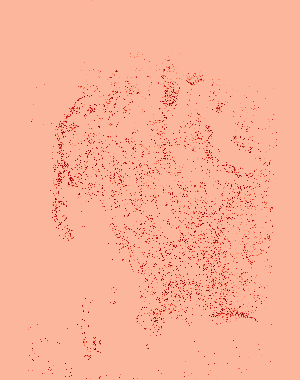

In [151]:
img1 = Image.fromarray((image_b[:, :, :3] * 255).astype(np.uint8))
img2 = Image.fromarray((image_r[:, :, :3] * 255).astype(np.uint8)).convert('RGBA')
img2

In [111]:
img = Image.blend(img1, img2, 0.5)


TypeError: 'Image' object is not subscriptable